In [17]:
# Import necessary libraries
import sys
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['font.size'] = 10
plt.style.use('seaborn-v0_8')

# Import our rotor dynamics analyzer
from rotor_dynamics_analyzer import RotorDynamicsAnalyzer
import pandas as pd
import numpy as np

print("✅ All libraries imported successfully!")
print("📊 Ready for rotor dynamics analysis!")

# Display Python environment info
print(f"\n🐍 Python version: {sys.version}")
print(f"📈 Matplotlib backend: {matplotlib.get_backend()}")


✅ All libraries imported successfully!
📊 Ready for rotor dynamics analysis!

🐍 Python version: 3.13.3 (main, Apr  8 2025, 13:54:08) [Clang 16.0.0 (clang-1600.0.26.6)]
📈 Matplotlib backend: module://matplotlib_inline.backend_inline


In [18]:
# Initialize the rotor dynamics analyzer
analyzer = RotorDynamicsAnalyzer()

# Generate synthetic gas turbine data (1000 rows, 30 columns)
print("🔄 Generating synthetic gas turbine data...")
data = analyzer.generate_synthetic_data(
    n_rows=1000,         # 1000 data points as requested
    n_cols=30,           # 30 parameters as requested  
    save_to_excel=True   # Save to Excel file
)

print(f"✅ Generated data successfully!")
print(f"📊 Data shape: {data.shape}")
print(f"📋 Columns: {list(data.columns)}")

# Display basic statistics
print(f"\n📈 Engine Speed Range: {data['Engine_Speed_RPM'].min():.0f} - {data['Engine_Speed_RPM'].max():.0f} RPM")
print(f"🎯 Bearing 1 Amplitude Range: {data['Bearing_1_Amplitude_mil'].min():.3f} - {data['Bearing_1_Amplitude_mil'].max():.3f} mil")
print(f"🎯 Bearing 2 Amplitude Range: {data['Bearing_2_Amplitude_mil'].min():.3f} - {data['Bearing_2_Amplitude_mil'].max():.3f} mil")


🔄 Generating synthetic gas turbine data...
Generating synthetic gas turbine data (1000 rows, 30 columns)...
Synthetic data saved to synthetic_gas_turbine_data.xlsx
Synthetic data generation completed!
✅ Generated data successfully!
📊 Data shape: (1000, 30)
📋 Columns: ['Time_s', 'Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', 'Bearing_1_Phase_deg', 'Bearing_2_Amplitude_mil', 'Bearing_2_Phase_deg', 'Turbine_Temp_C', 'Compressor_Temp_C', 'Compressor_Pressure_bar', 'Fuel_Flow_kg_h', 'Air_Flow_kg_s', 'Parameter_12', 'Parameter_13', 'Parameter_14', 'Parameter_15', 'Parameter_16', 'Parameter_17', 'Parameter_18', 'Parameter_19', 'Parameter_20', 'Parameter_21', 'Parameter_22', 'Parameter_23', 'Parameter_24', 'Parameter_25', 'Parameter_26', 'Parameter_27', 'Parameter_28', 'Parameter_29', 'Parameter_30']

📈 Engine Speed Range: 0 - 12026 RPM
🎯 Bearing 1 Amplitude Range: 0.240 - 4.080 mil
🎯 Bearing 2 Amplitude Range: 0.503 - 4.466 mil


In [19]:
# Display a preview of the generated data
print("📋 Data Preview:")
print("="*80)
display(data.head(10))

print("\n📊 Data Statistics:")
print("="*80)
display(data[['Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', 'Bearing_2_Amplitude_mil', 
              'Turbine_Temp_C', 'Compressor_Pressure_bar']].describe())


📋 Data Preview:


,Time_s,Engine_Speed_RPM,Bearing_1_Amplitude_mil,Bearing_1_Phase_deg,Bearing_2_Amplitude_mil,Bearing_2_Phase_deg,Turbine_Temp_C,Compressor_Temp_C,Compressor_Pressure_bar,Fuel_Flow_kg_h,...,Parameter_21,Parameter_22,Parameter_23,Parameter_24,Parameter_25,Parameter_26,Parameter_27,Parameter_28,Parameter_29,Parameter_30
0,0.000000,0.000000,0.502650,39.771672,0.762060,123.357576,278.978961,11.033768,1.147191,42.043870,...,817.412172,824.525918,967.485460,263.009564,16.413223,76.435623,741.698422,87.466442,307.053540,1385.214773
1,3.603604,20.213654,0.609914,37.351110,0.609187,125.031582,405.372338,85.191157,3.932157,501.724505,...,669.266484,880.221010,820.448508,348.441282,27.925620,53.499108,780.416258,123.694715,405.663410,1547.421972
2,7.207207,168.413872,0.506815,39.118234,0.630866,124.625427,1672.561531,698.095342,26.258510,3414.886497,...,1116.953633,1238.606073,1742.032634,711.524371,36.813504,84.884763,1745.657164,244.473991,757.475346,2248.425407
3,10.810811,155.815601,0.526078,40.694686,0.701812,121.743058,1558.017849,628.002300,24.306920,3094.204890,...,1174.259758,1537.571166,1503.506635,624.182945,32.614101,90.683377,1343.681416,193.167435,672.619609,1831.405772
4,14.414414,286.702042,0.418316,43.884548,0.831703,124.151566,2588.942606,1164.820308,43.994997,5798.695202,...,1780.376981,2185.998481,2162.580217,979.715765,44.978784,122.278994,2126.659404,298.205659,1046.352678,3069.958812
5,18.018018,218.260002,0.348824,41.595731,0.926204,123.671332,2037.510624,889.593829,33.843461,4358.477704,...,1367.902186,1935.982560,2125.996742,845.396430,34.667012,111.944588,1648.928774,259.967427,842.395803,2343.098721
6,21.621622,366.104750,0.589277,47.765718,0.649081,128.065911,3203.900545,1465.879155,56.292467,7298.967620,...,1927.327316,2685.150395,2747.650454,1166.965698,39.463109,135.221772,2416.072252,363.128979,1170.289967,3274.839770
7,25.225225,466.879050,0.521006,47.757868,0.713133,130.059526,4042.285797,1893.009185,70.803992,9435.796880,...,2294.151334,3103.398160,3075.318087,1469.474015,48.142500,182.096523,2718.059417,453.143743,1318.027491,4393.859288
8,28.828829,412.556166,0.835342,48.172185,0.693177,128.526108,3617.045965,1648.177425,62.785989,8279.986299,...,2143.226771,2829.708210,2573.637438,1357.526594,47.935060,141.159334,2653.367294,391.220397,1270.703416,3710.651723
9,32.432432,453.133628,0.427970,50.202378,0.570427,125.807663,3923.396069,1823.176995,69.056315,9140.251115,...,2329.348643,3144.967312,2938.705327,1400.761910,55.442994,176.428639,2927.879417,435.244232,1371.610086,3853.747261



📊 Data Statistics:


,Engine_Speed_RPM,Bearing_1_Amplitude_mil,Bearing_2_Amplitude_mil,Turbine_Temp_C,Compressor_Pressure_bar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6333.106701,1.732009,2.066763,50965.343709,950.961519
std,3057.646965,1.128771,1.120734,24460.690626,458.664369
min,0.000000,0.239967,0.503098,268.321021,-0.140269
25%,3333.815833,0.886369,1.244045,26986.915232,501.577131
50%,6710.795091,1.114661,1.510563,53974.858814,1008.513655
75%,8074.865258,2.845447,3.134157,64883.782352,1212.913588
max,12026.149073,4.079556,4.465669,96523.540082,1804.690526


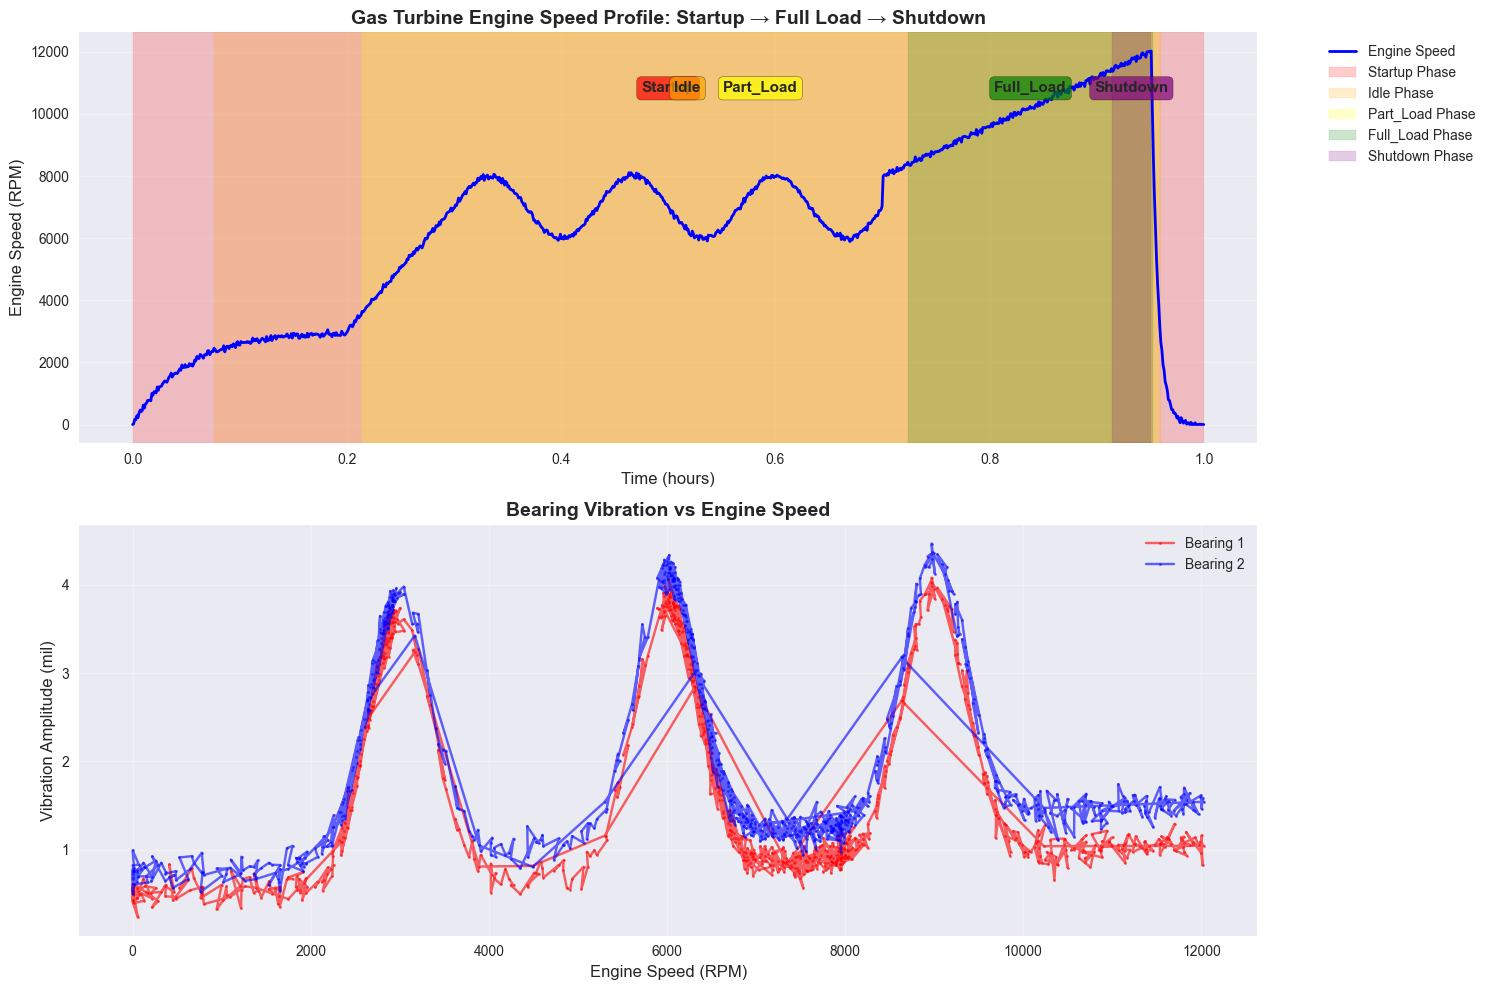

📊 Engine speed trend visualization completed!
🚀 Operation covers 1.0 hours from startup to shutdown


In [20]:
# Create engine speed trend plot with phase labels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Engine Speed vs Time
time_hours = data['Time_s'] / 3600  # Convert to hours
speed = data['Engine_Speed_RPM']

ax1.plot(time_hours, speed, 'b-', linewidth=2, label='Engine Speed')
ax1.set_xlabel('Time (hours)', fontsize=12)
ax1.set_ylabel('Engine Speed (RPM)', fontsize=12)
ax1.set_title('Gas Turbine Engine Speed Profile: Startup → Full Load → Shutdown', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add phase annotations
speed_range = speed.max() - speed.min()
phases = analyzer.engine_phases

colors = ['red', 'orange', 'yellow', 'green', 'purple']
for i, (phase_name, (start_pct, end_pct)) in enumerate(phases.items()):
    start_speed = speed.min() + (start_pct / 100) * speed_range
    end_speed = speed.min() + (end_pct / 100) * speed_range
    
    # Find time range for this phase
    mask = (speed >= start_speed) & (speed <= end_speed)
    if mask.any():
        time_start = time_hours[mask].iloc[0]
        time_end = time_hours[mask].iloc[-1]
        
        ax1.axvspan(time_start, time_end, alpha=0.2, color=colors[i], 
                   label=f'{phase_name.title()} Phase')
        
        # Add text label
        mid_time = (time_start + time_end) / 2
        ax1.text(mid_time, speed.max() * 0.9, phase_name.title(),
                ha='center', va='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i], alpha=0.7))

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Bearing vibration during operation
ax2.plot(speed, data['Bearing_1_Amplitude_mil'], 'ro-', markersize=2, alpha=0.6, label='Bearing 1')
ax2.plot(speed, data['Bearing_2_Amplitude_mil'], 'bo-', markersize=2, alpha=0.6, label='Bearing 2')
ax2.set_xlabel('Engine Speed (RPM)', fontsize=12)
ax2.set_ylabel('Vibration Amplitude (mil)', fontsize=12)
ax2.set_title('Bearing Vibration vs Engine Speed', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("📊 Engine speed trend visualization completed!")
print(f"🚀 Operation covers {time_hours.max():.1f} hours from startup to shutdown")


🎯 Creating Polar Plot for Bearing 1 Dynamic Trim Balance...
📉 Applying RDP algorithm to reduce data crowding...
Data reduced from 1000 to 538 points (53.8% reduction)
Data reduced from 1000 to 467 points (46.7% reduction)


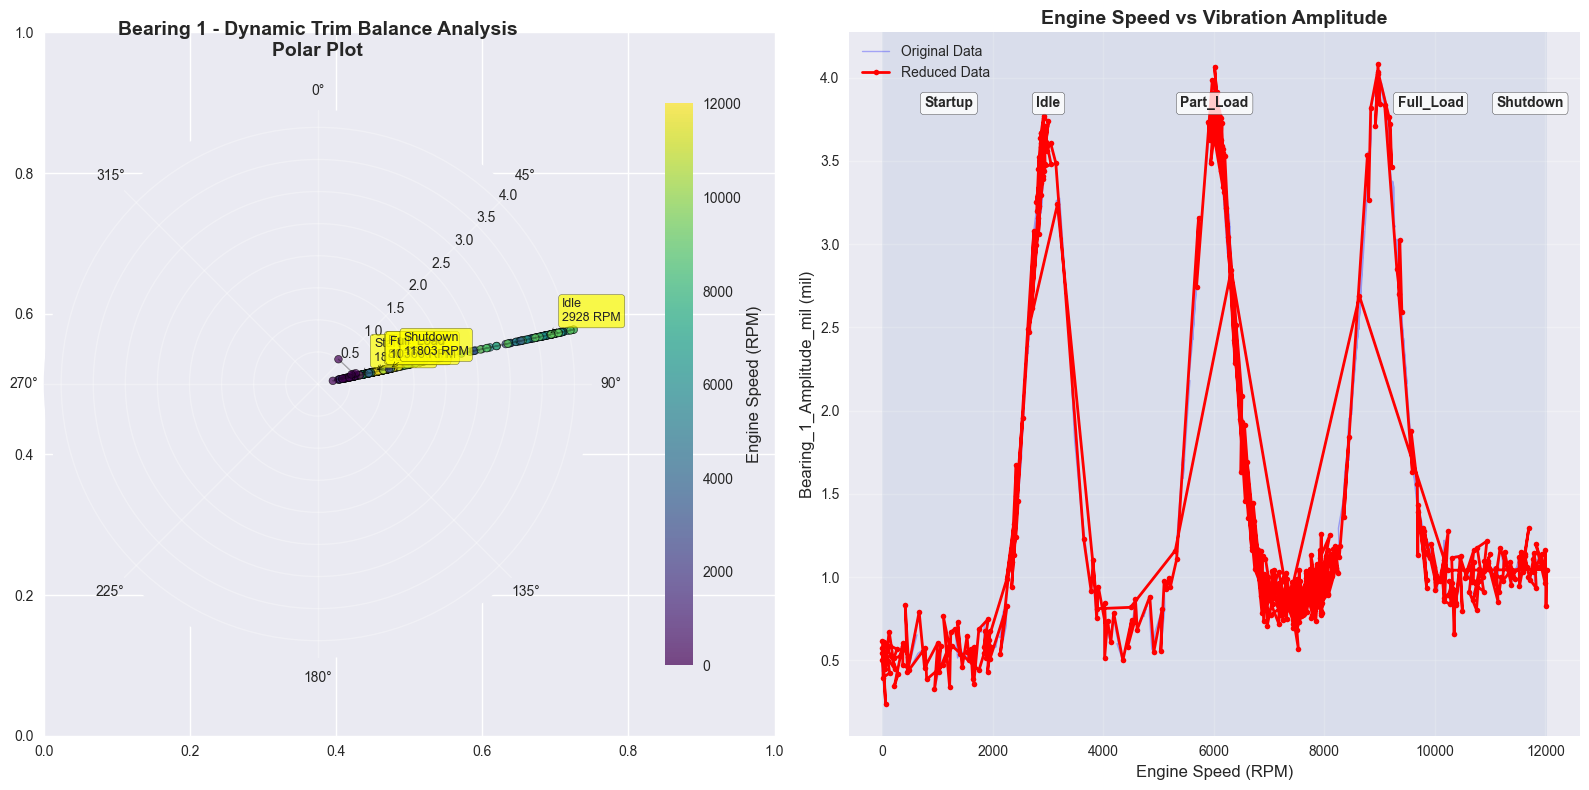


ROTOR DYNAMICS ANALYSIS SUMMARY
Data Points - Original: 1000, Reduced: 538
Speed Range: 0 - 12026 RPM
Amplitude Range: 0.24 - 4.08 mil
Phase Range: 37.4 - 300.5 degrees

Critical Speeds Detected:
  1. 2784 RPM - Amplitude: 3.18 mil
  2. 2738 RPM - Amplitude: 2.87 mil
  3. 2766 RPM - Amplitude: 2.92 mil
  4. 2779 RPM - Amplitude: 3.18 mil
  5. 2834 RPM - Amplitude: 3.32 mil


In [21]:
# Create polar plot for Bearing 1 with RDP data reduction
print("🎯 Creating Polar Plot for Bearing 1 Dynamic Trim Balance...")
print("📉 Applying RDP algorithm to reduce data crowding...")

analyzer.create_polar_plot(
    amplitude_col='Bearing_1_Amplitude_mil',
    phase_col='Bearing_1_Phase_deg',
    speed_col='Engine_Speed_RPM',
    title="Bearing 1 - Dynamic Trim Balance Analysis",
    reduce_data=True,    # Apply RDP data reduction
    epsilon=0.005        # RDP threshold for data reduction
)

plt.show()


🎯 Creating Polar Plot for Bearing 2 Dynamic Trim Balance...
📉 Applying RDP algorithm with different threshold...
Data reduced from 1000 to 375 points (37.5% reduction)
Data reduced from 1000 to 226 points (22.6% reduction)


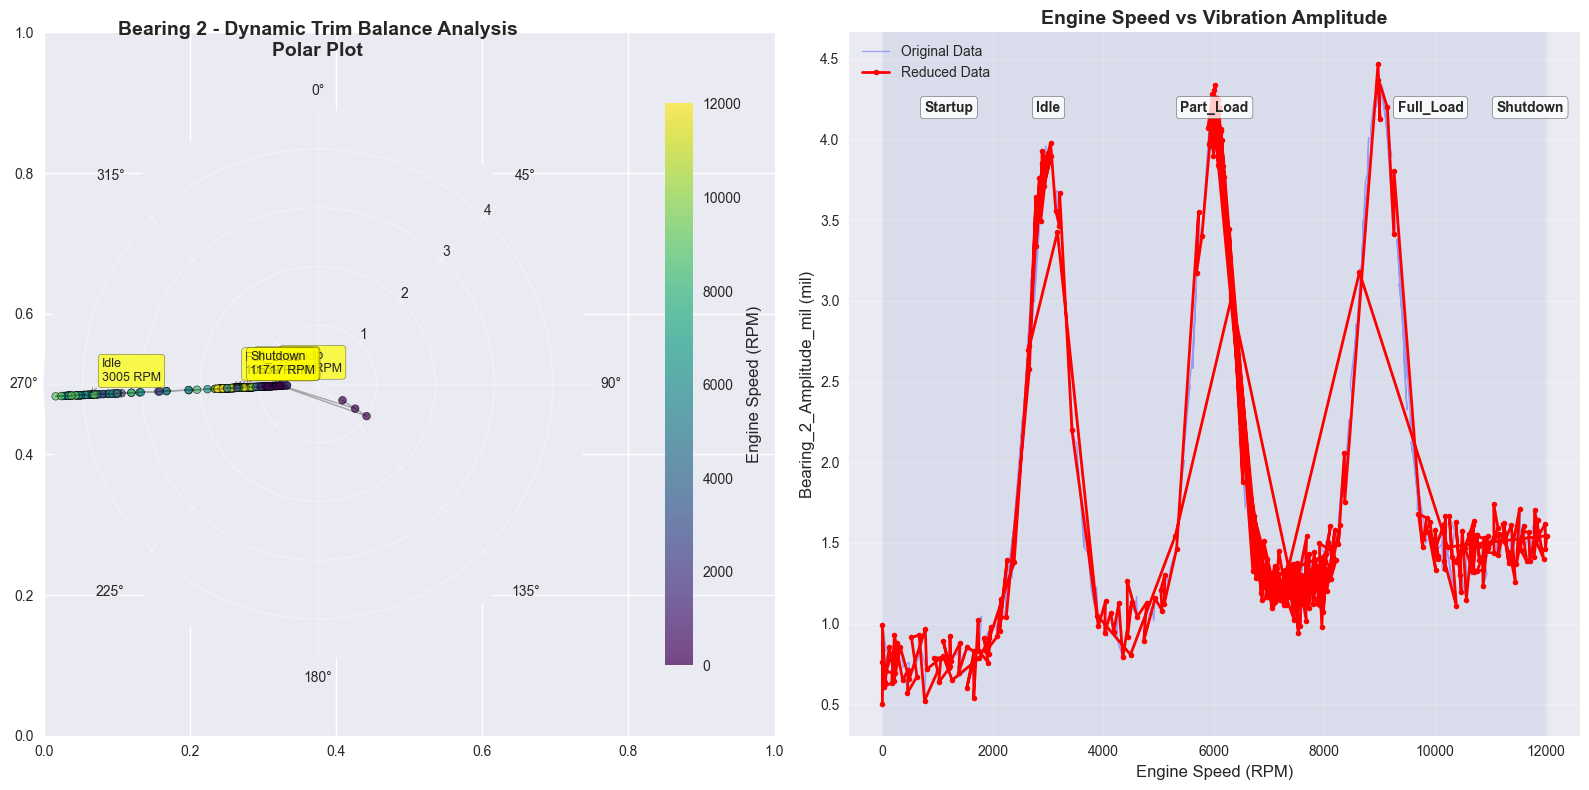


ROTOR DYNAMICS ANALYSIS SUMMARY
Data Points - Original: 1000, Reduced: 375
Speed Range: 0 - 12026 RPM
Amplitude Range: 0.50 - 4.47 mil
Phase Range: 1.8 - 359.9 degrees

Critical Speeds Detected:
  1. 2784 RPM - Amplitude: 3.39 mil
  2. 2766 RPM - Amplitude: 3.28 mil
  3. 2779 RPM - Amplitude: 3.65 mil
  4. 2834 RPM - Amplitude: 3.63 mil
  5. 2754 RPM - Amplitude: 3.37 mil


In [22]:
# Create polar plot for Bearing 2 
print("🎯 Creating Polar Plot for Bearing 2 Dynamic Trim Balance...")
print("📉 Applying RDP algorithm with different threshold...")

analyzer.create_polar_plot(
    amplitude_col='Bearing_2_Amplitude_mil',
    phase_col='Bearing_2_Phase_deg',
    speed_col='Engine_Speed_RPM',
    title="Bearing 2 - Dynamic Trim Balance Analysis",
    reduce_data=True,    # Apply RDP data reduction
    epsilon=0.008        # Slightly different RDP threshold
)

plt.show()


🔍 Demonstrating RDP Algorithm Data Reduction...
Data reduced from 1000 to 910 points (91.0% reduction)
Data reduced from 1000 to 538 points (53.8% reduction)
Data reduced from 1000 to 293 points (29.3% reduction)
Data reduced from 1000 to 145 points (14.5% reduction)


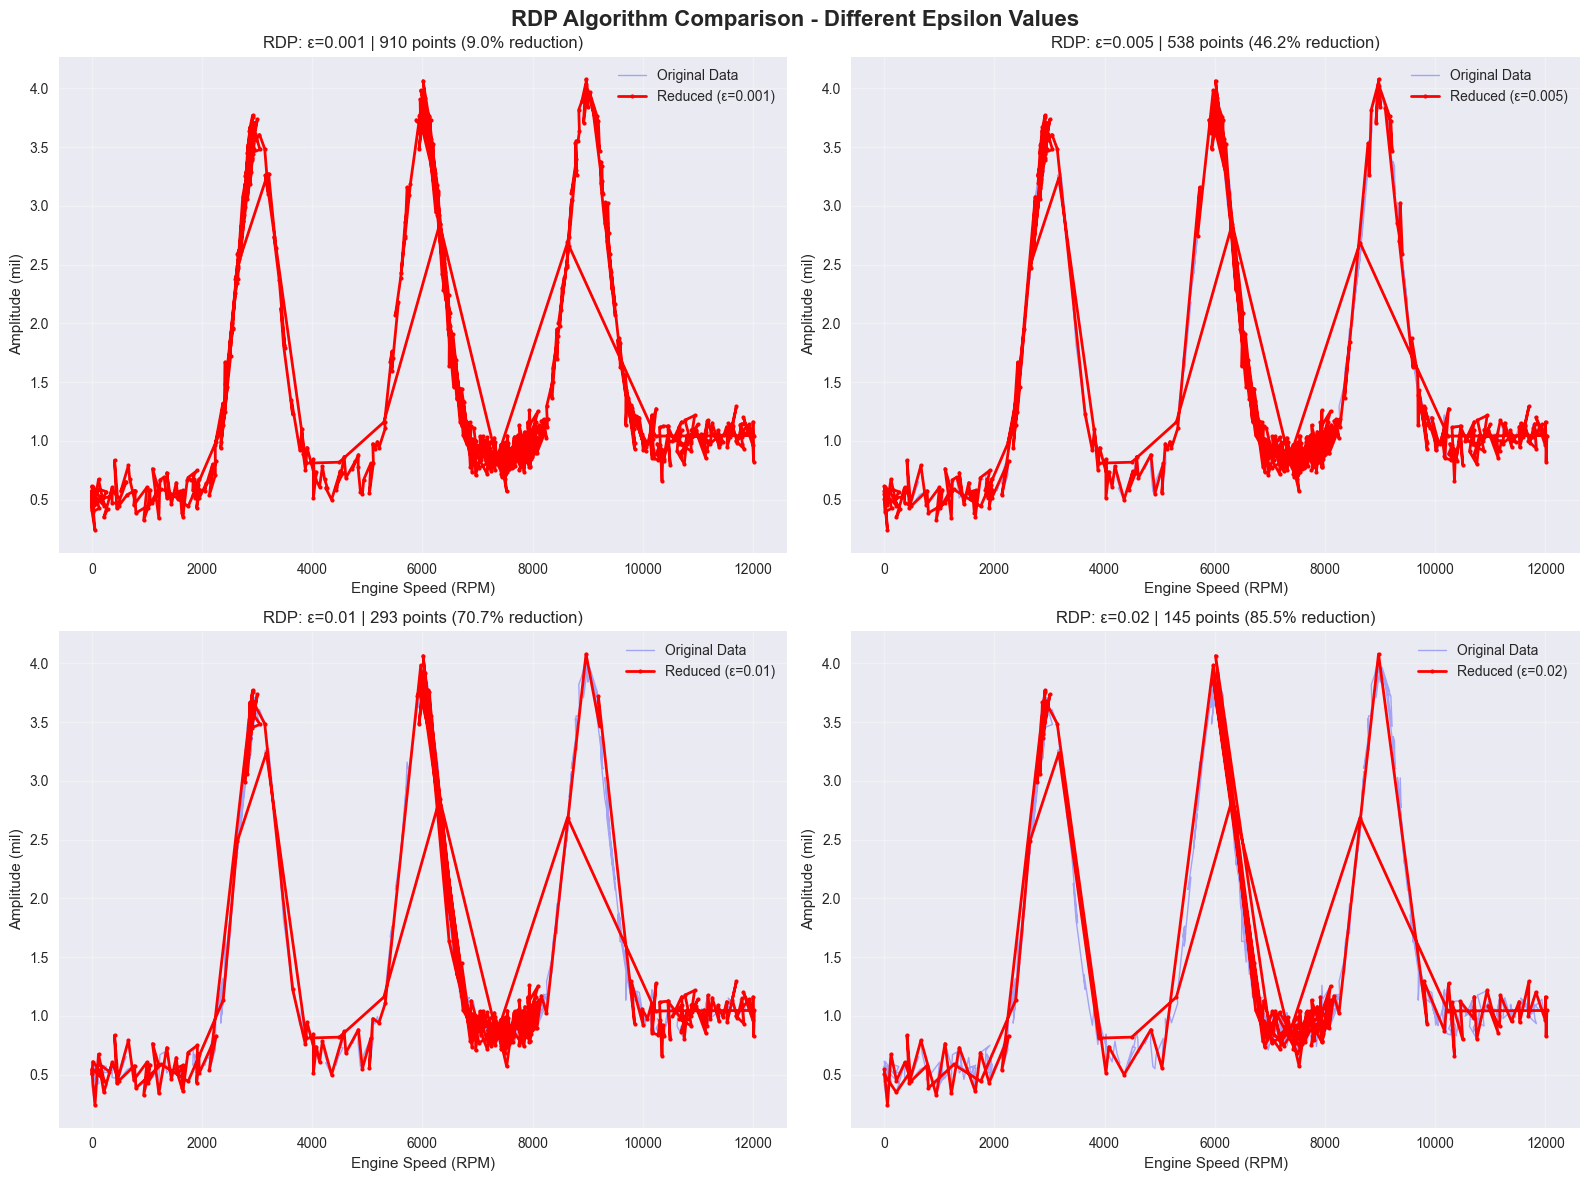

📊 Original data points: 1000
📉 RDP algorithm successfully reduces data while preserving key features!


In [23]:
# Demonstrate RDP algorithm with different epsilon values
print("🔍 Demonstrating RDP Algorithm Data Reduction...")

# Test different epsilon values
epsilon_values = [0.001, 0.005, 0.01, 0.02]
original_points = len(data)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, epsilon in enumerate(epsilon_values):
    # Apply RDP reduction
    reduced_data = analyzer.reduce_data('Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', epsilon=epsilon)
    
    # Plot comparison
    ax = axes[i]
    original_speed = data['Engine_Speed_RPM'].values
    original_amplitude = data['Bearing_1_Amplitude_mil'].values
    
    ax.plot(original_speed, original_amplitude, 'b-', alpha=0.3, linewidth=1, label='Original Data')
    ax.plot(reduced_data[:, 0], reduced_data[:, 1], 'ro-', markersize=3, 
            linewidth=2, label=f'Reduced (ε={epsilon})')
    
    reduction_pct = (1 - len(reduced_data)/original_points) * 100
    
    ax.set_xlabel('Engine Speed (RPM)')
    ax.set_ylabel('Amplitude (mil)')
    ax.set_title(f'RDP: ε={epsilon} | {len(reduced_data)} points ({reduction_pct:.1f}% reduction)')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('RDP Algorithm Comparison - Different Epsilon Values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"📊 Original data points: {original_points}")
print("📉 RDP algorithm successfully reduces data while preserving key features!")


In [24]:
# Demonstrate Excel file reading and analysis
print("📁 Reading gas turbine data from Excel file...")

# Create a new analyzer instance for Excel data
excel_analyzer = RotorDynamicsAnalyzer()

# Read the Excel file we generated
excel_data = excel_analyzer.read_excel_data('synthetic_gas_turbine_data.xlsx')

if excel_data is not None:
    print("✅ Excel file loaded successfully!")
    
    # Display file information
    print(f"📊 Loaded data shape: {excel_data.shape}")
    print(f"📈 Speed range: {excel_data['Engine_Speed_RPM'].min():.0f} - {excel_data['Engine_Speed_RPM'].max():.0f} RPM")
    
    # Critical speed detection
    from scipy.signal import find_peaks
    
    amplitude = excel_data['Bearing_1_Amplitude_mil'].values
    speed = excel_data['Engine_Speed_RPM'].values
    
    # Find critical speeds (peaks in amplitude)
    peaks, properties = find_peaks(amplitude, height=np.mean(amplitude) + np.std(amplitude))
    
    print(f"\n🎯 Critical Speed Analysis:")
    print(f"📍 Found {len(peaks)} potential critical speeds:")
    
    for i, peak_idx in enumerate(peaks[:5]):  # Show top 5
        print(f"   {i+1}. {speed[peak_idx]:.0f} RPM - Amplitude: {amplitude[peak_idx]:.3f} mil")
    
    # Show Excel data sample
    print("\n📋 Excel Data Sample:")
    display(excel_data[['Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', 'Bearing_2_Amplitude_mil', 
                       'Turbine_Temp_C', 'Fuel_Flow_kg_h']].head())
    
else:
    print("❌ Failed to load Excel file")

print("\n💡 To analyze your own data:")
print("   1. Replace 'synthetic_gas_turbine_data.xlsx' with your file path")
print("   2. Adjust column names to match your data structure")
print("   3. Run the polar plot analysis with your specific parameters")


📁 Reading gas turbine data from Excel file...
Reading data from synthetic_gas_turbine_data.xlsx...
Data loaded successfully! Shape: (1000, 30)
Columns: ['Time_s', 'Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', 'Bearing_1_Phase_deg', 'Bearing_2_Amplitude_mil', 'Bearing_2_Phase_deg', 'Turbine_Temp_C', 'Compressor_Temp_C', 'Compressor_Pressure_bar', 'Fuel_Flow_kg_h', 'Air_Flow_kg_s', 'Parameter_12', 'Parameter_13', 'Parameter_14', 'Parameter_15', 'Parameter_16', 'Parameter_17', 'Parameter_18', 'Parameter_19', 'Parameter_20', 'Parameter_21', 'Parameter_22', 'Parameter_23', 'Parameter_24', 'Parameter_25', 'Parameter_26', 'Parameter_27', 'Parameter_28', 'Parameter_29', 'Parameter_30']
✅ Excel file loaded successfully!
📊 Loaded data shape: (1000, 30)
📈 Speed range: 0 - 12026 RPM

🎯 Critical Speed Analysis:
📍 Found 84 potential critical speeds:
   1. 2784 RPM - Amplitude: 3.183 mil
   2. 2738 RPM - Amplitude: 2.875 mil
   3. 2766 RPM - Amplitude: 2.921 mil
   4. 2779 RPM - Amplitude: 3.185 mil

,Engine_Speed_RPM,Bearing_1_Amplitude_mil,Bearing_2_Amplitude_mil,Turbine_Temp_C,Fuel_Flow_kg_h
0,0.000000,0.502650,0.762060,278.978961,42.043870
1,20.213654,0.609914,0.609187,405.372338,501.724505
2,168.413872,0.506815,0.630866,1672.561531,3414.886497
3,155.815601,0.526078,0.701812,1558.017849,3094.204890
4,286.702042,0.418316,0.831703,2588.942606,5798.695202



💡 To analyze your own data:
   1. Replace 'synthetic_gas_turbine_data.xlsx' with your file path
   2. Adjust column names to match your data structure
   3. Run the polar plot analysis with your specific parameters
